## Using Deep Learning with R

Colab Notebooks can be used with R. To start a fresh notebook use:

https://colab.research.google.com/notebook#create=true&language=r

The strange thing is that TensorFlow is not installed in Google R Notebooks. So we need to install it first, this takes some time.

Hallo $\sum_i=1 x_i$

In [17]:
a = 1

In [2]:
a

[1] 1

In [4]:
(a <- 1) #We have R, with all it's beauty ;-) 
a + 1 
#library(tensorflow) #Needs to be installed first

[1] 1

[1] 2

ERROR: ignored

## Installing TensorFlow and Keras

The deep learning packages, TensorFlow and Keras are not installed by default, but can be installed as follows:

In [5]:
#Installing TF and Keras takes approx 2 minutes
ptm <- proc.time()
install.packages("tensorflow")
install.packages("keras")
proc.time() - ptm
#devtools::install_github("rstudio/keras") works ok but no tfp

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘reticulate’, ‘tfruns’, ‘tfautograph’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zeallot’




   user  system elapsed 
 86.567   8.330  99.810 

In [6]:
library(keras)
library(tensorflow)
d = tf$version
d$VERSION #2.3.0

Loaded Tensorflow version 2.8.2



[1] "2.8.2"

### Testing TF

In [8]:
#We are using tf 2.0
a <- tf$constant(5)
b <- tf$constant(6)
c <- a * b
print(c$numpy())

[1] 30


### Testing Keras

In [9]:
mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y
# reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train <- x_train / 255
x_test <- x_test / 255
# To cats
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)
# model definition
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2 (Dense)                    (None, 256)                     200960      
 dropout_1 (Dropout)                (None, 256)                     0           
 dense_1 (Dense)                    (None, 128)                     32896       
 dropout (Dropout)                  (None, 128)                     0           
 dense (Dense)                      (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________________________________________


In [10]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)
history = fit(model, x_train, y_train, batch_size = 128, epochs = 5, validation_split = 0.2, verbose=TRUE)

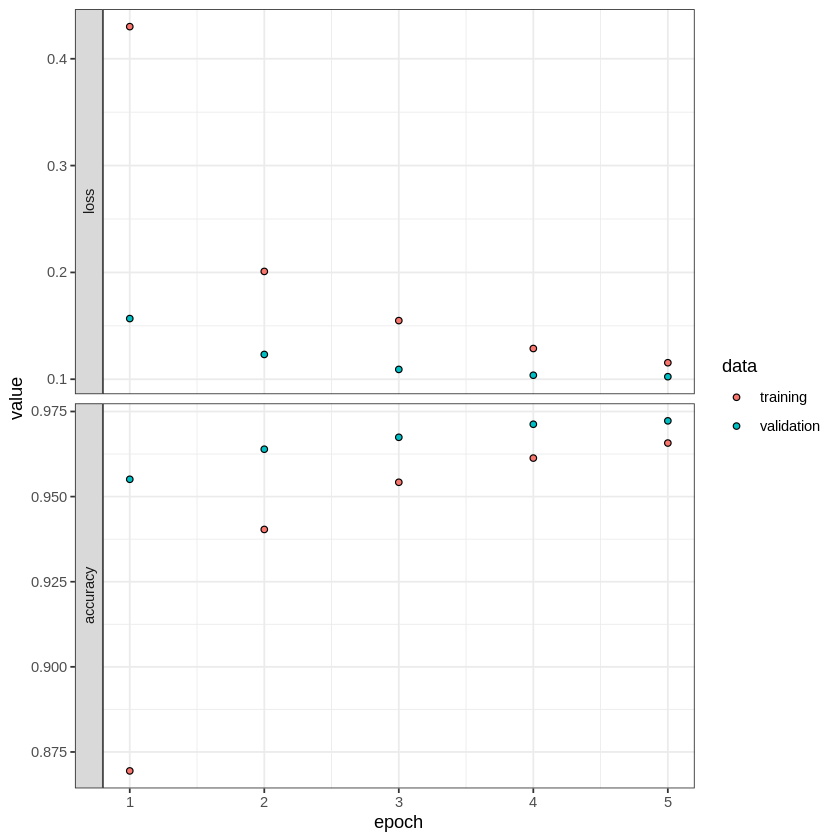

In [11]:
library(ggplot2) #ggplot is installed but not TensorFlow
plot(history) + theme_bw() #Getting all the R goodies

## Installing TFP

Later in the course, we also need tfprobability, which can be installed as follows:

In [12]:
install.packages("tfprobability") #needs approx 30 seconds

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
library(tfprobability)

### Testing TFP

In [14]:
d = tfd_binomial(total_count = 7, probs = 0.3)

# compute mean
tfd_mean(d) #7 * 0.3 = 2.1
# compute variance
tfd_variance(d)
# compute probability
tfd_prob(d, 2.3)

d$sample(10L)
d$prob(4)

tf.Tensor(2.1000001, shape=(), dtype=float32)

tf.Tensor(1.47, shape=(), dtype=float32)

tf.Tensor(0.30379128, shape=(), dtype=float32)

tf.Tensor([1. 2. 0. 4. 1. 2. 0. 2. 3. 1.], shape=(10), dtype=float32)

tf.Tensor(0.09724047, shape=(), dtype=float32)

In [15]:
sessionInfo() # tfprobability_0.11.0.0 keras_2.3.0.0 tensorflow_2.2.0 

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tfprobability_0.15.1 ggplot2_3.3.6        tensorflow_2.9.0    
[4] keras_2.9.0         

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9       pillar_1.8.1     compiler_4.2.1   base64enc_0.1-3 
 [5] tools_4.2.1      zeallot_0.1.0    digest_0.6.29    uuid_